## Two-phase Cahn-Hilliard solvers

In [1]:
import voxelsss as vox
import numpy as np

Initialize field with random noise

In [2]:
nx, ny, nz = [100, 100, 100]

sim = vox.VoxelFields(nx, ny, nz, (nx,ny,nz))
noise = 0.5 + 0.1*np.random.rand(nx, ny, nz)

### Euler explicit

Solve spinodal decomposition starting from random noise until time 100.
The optional argument 'variable_m' determines which sort of mobility is used.
 - variable_m= False: mobility = D_0
 - variable_m= True:  mobility = D_0 * c * (1-c)

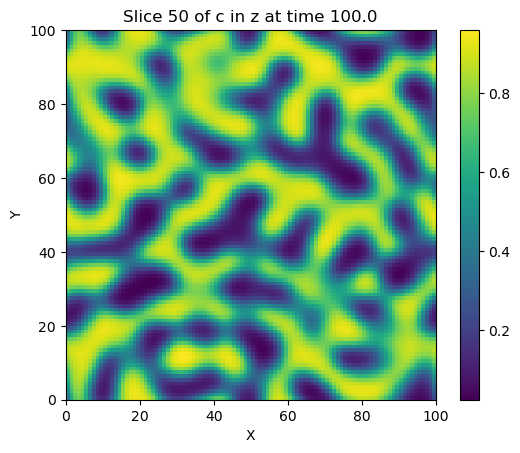

Wall time: 62.5119 s (0.0031 s/iter)
GPU-RAM currently allocated 25.22 MB (65.01 MB reserved)
GPU-RAM maximally allocated 46.43 MB (65.01 MB reserved)


In [3]:
%matplotlib inline
dt = 0.005
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
# a.solve(variable_m = False, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
a.solve(variable_m = True, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)


### Semi-implicit FFT solver

The semi-implicit scheme allows for much larger timesteps.
In this case, the *add_field* overwrites the previous solver solution with the initial noise field befor the start of the simulation.

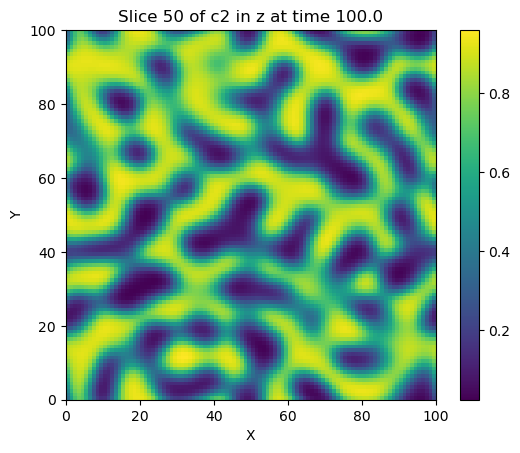

Wall time: 7.1251 s (0.0071 s/iter)
GPU-RAM currently allocated 57.95 MB (106.95 MB reserved)
GPU-RAM maximally allocated 83.89 MB (106.95 MB reserved)


In [4]:
%matplotlib inline
dt = 0.1
iter = int(100/dt)
sim.add_field("c2", noise)
a = vox.CahnHilliardSolver(sim, "c2", device='cuda')
a.solve_FFT(time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
# a.solve_FFT(time_increment=dt, max_iters=iter, vtk_out=False)

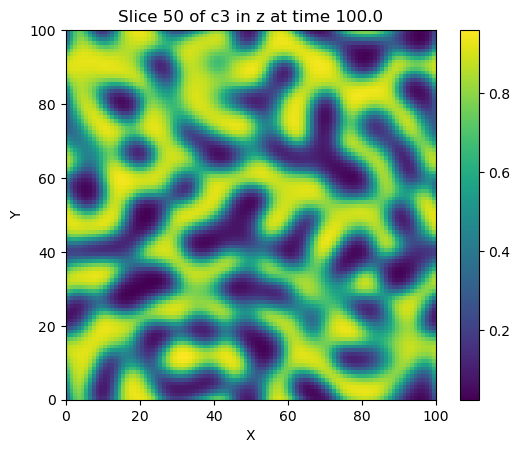

Wall time: 6.5565 s (0.0066 s/iter)
GPU-RAM currently allocated 51.40 MB (127.93 MB reserved)
GPU-RAM maximally allocated 84.38 MB (127.93 MB reserved)


In [5]:
%matplotlib inline
dt = 0.1
iter = int(100/dt)
sim.add_field("c3", noise)
a = vox.CahnHilliardSolver(sim, "c3", device='cuda')
a.solve_FFT2(time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
# a.solve_FFT2(time_increment=dt, max_iters=iter, vtk_out=False)

Plot the field in interactive mode to look at the third dimension

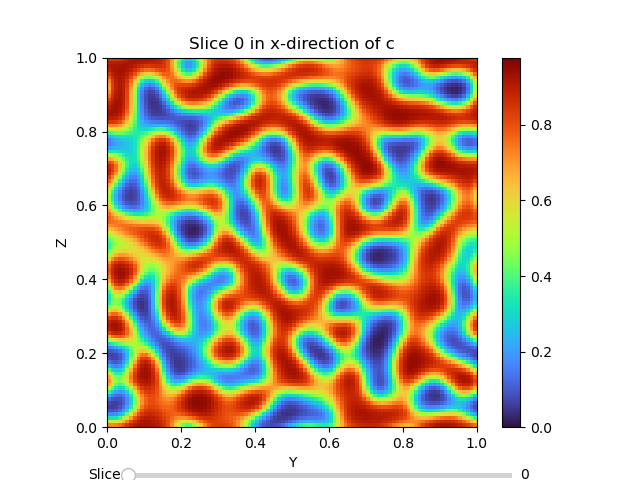

In [6]:
%matplotlib widget
sim.plot_field_interactive("c", direction='x', colormap='turbo')

0.10572773


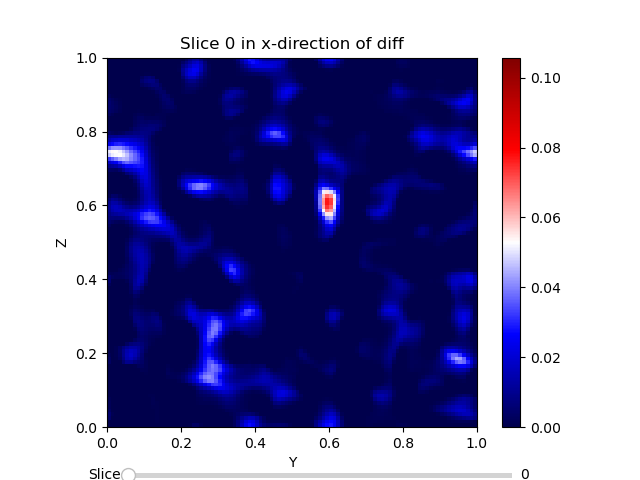

In [7]:
%matplotlib widget
difference = sim.fields["c2"]-sim.fields["c3"]
sim.add_field("diff", difference)
sim.plot_field_interactive("diff", colormap='seismic')
print(np.max(np.abs(difference)))